Carreguem les dades

In [84]:
import pandas as pd

# Carreguem el CSV preparat
df = pd.read_csv("data/df_preparat.csv")



Comencem a buscar resultats amb les regles d'associació

In [85]:
# Agrupem per transacció: cistella de productes per Transaction_ID
basket = df.groupby('CustomerID')['Product_Description'].apply(list)

# Mostrem un exemple de cistella
basket.head()


CustomerID
12346.0    [Google Stylus Pen w/ LED Light, Android Men's...
12347.0    [Nest Learning Thermostat 3rd Gen-USA - Stainl...
12348.0    [Nest Cam Outdoor Security Camera - USA, Googl...
12350.0    [Nest Learning Thermostat 3rd Gen-USA - Stainl...
12356.0    [Nest Cam Indoor Security Camera - USA, Nest L...
Name: Product_Description, dtype: object

In [86]:
from collections import Counter

# Aplanem totes les llistes de productes
flat_product_list = [product for products in basket for product in products]

# Comptem freqüències
product_counter = Counter(flat_product_list)

# Convertim a DataFrame per ordenar i mostrar
df_product_freq = pd.DataFrame(product_counter.items(), columns=['Product', 'Frequency'])
df_product_freq = df_product_freq.sort_values(by='Frequency', ascending=False)

# Mostrem els 10 productes més comprats
df_product_freq.head(10)


,Product,Frequency
2,Nest Learning Thermostat 3rd Gen-USA - Stainle...,3511
5,Nest Cam Outdoor Security Camera - USA,3328
4,Nest Cam Indoor Security Camera - USA,3230
48,Google Sunglasses,1523
6,Nest Protect Smoke + CO White Battery Alarm-USA,1361
21,Nest Learning Thermostat 3rd Gen-USA - White,1089
3,Nest Protect Smoke + CO White Wired Alarm-USA,1065
50,Google 22 oz Water Bottle,902
119,Nest Thermostat E - USA,844
24,Google Laptop and Cell Phone Stickers,806


In [87]:
from itertools import combinations

pair_counter = Counter()

for products in basket:
    # Eliminem duplicats dins de cada transacció per no sobrecomptar
    unique_products = set(products)
    # Combinacions de 2 en 2
    pairs = combinations(unique_products, 2)
    pair_counter.update(pairs)

# Convertim a DataFrame
df_pair_freq = pd.DataFrame(pair_counter.items(), columns=['Product_Pair', 'Frequency'])
df_pair_freq = df_pair_freq.sort_values(by='Frequency', ascending=False)

# Mostrem les 10 parelles més freqüents
df_pair_freq.head(10)


,Product_Pair,Frequency
353,"(Nest Cam Indoor Security Camera - USA, Nest L...",729
393,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,585
368,"(Nest Cam Indoor Security Camera - USA, Nest C...",547
213,(Nest Protect Smoke + CO White Battery Alarm-U...,531
212,(Nest Protect Smoke + CO White Battery Alarm-U...,530
362,"(Nest Cam Indoor Security Camera - USA, Nest L...",459
387,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,455
149,(Nest Protect Smoke + CO White Wired Alarm-USA...,454
150,(Nest Protect Smoke + CO White Wired Alarm-USA...,426
228,(Nest Protect Smoke + CO White Battery Alarm-U...,413


4.2 Implementació de regles d’associació (Apriori, FP-Growth)

In [88]:
# Suposem que tens un dataframe amb les columnes ['CustomerID', 'Product_Description']
basket_lists = basket.tolist()



Parelles

In [89]:
from itertools import combinations
from collections import Counter
import pandas as pd

# PAS 1: Comptar freqüència individual de cada producte
item_counter = Counter([item for basket in basket_lists for item in basket])
df_items = pd.DataFrame(item_counter.items(), columns=['Item', 'Support'])
df_items = df_items.sort_values(by='Support', ascending=False)

# PAS 2: Agafar el 5% més freqüent
top_5_percent = int(len(df_items) * 0.1)
top_items = set(df_items['Item'].head(top_5_percent))

print("Nombre d'ítems seleccionats (top 5%):", len(top_items))

# PAS 3: Filtrar les cistelles per mantenir només els ítems seleccionats
basket_lists_reduced = []
for basket in basket_lists:
    filtered = [item for item in basket if item in top_items]
    if len(filtered) >= 2:
        basket_lists_reduced.append(filtered)

print("Nombre de cistelles després de filtrar:", len(basket_lists_reduced))

# PAS 4: Comptar parelles només amb ítems seleccionats
pair_counter = Counter()
for basket in basket_lists_reduced:
    unique_products = set(basket)
    pair_counter.update(combinations(sorted(unique_products), 2))

# PAS 5: Crear DataFrame i filtrar per suport mínim
df_pairs = pd.DataFrame(pair_counter.items(), columns=['Itemset', 'Support'])
df_pairs = df_pairs[df_pairs['Support'] >= 20].sort_values(by='Support', ascending=False)

# PAS 6: Obtenir ítems freqüents resultants
items_k2 = set()
for pair in df_pairs['Itemset']:
    items_k2.update(pair)

# Resultats
print("Nombre de parelles freqüents:", len(df_pairs))
display(df_pairs.head(10))


Nombre d'ítems seleccionats (top 5%): 40
Nombre de cistelles després de filtrar: 1318
Nombre de parelles freqüents: 780


,Itemset,Support
100,"(Nest Cam Indoor Security Camera - USA, Nest C...",792
102,"(Nest Cam Indoor Security Camera - USA, Nest L...",771
109,"(Nest Cam Outdoor Security Camera - USA, Nest ...",768
122,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,546
111,"(Nest Cam Outdoor Security Camera - USA, Nest ...",538
104,"(Nest Cam Indoor Security Camera - USA, Nest P...",530
105,"(Nest Cam Indoor Security Camera - USA, Nest P...",499
123,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,494
112,"(Nest Cam Outdoor Security Camera - USA, Nest ...",481
103,"(Nest Cam Indoor Security Camera - USA, Nest L...",460


Tripletes

In [90]:
from itertools import combinations
from collections import Counter
import pandas as pd

# PAS 1: Comptar freqüència individual de cada producte
item_counter = Counter([item for basket in basket_lists for item in basket])
df_items = pd.DataFrame(item_counter.items(), columns=['Item', 'Support'])
df_items = df_items.sort_values(by='Support', ascending=False)

print("Nombre de cistelles després de filtrar:", len(basket_lists_reduced))

# PAS 4: Comptar parelles només amb ítems seleccionats
pair_counter = Counter()
for basket in basket_lists_reduced:
    unique_products = set(basket)
    pair_counter.update(combinations(sorted(unique_products), 2))

# PAS 5: Crear DataFrame i filtrar per suport mínim
df_pairs = pd.DataFrame(pair_counter.items(), columns=['Itemset', 'Support'])
df_pairs = df_pairs[df_pairs['Support'] >= 20].sort_values(by='Support', ascending=False)

print("Nombre de parelles freqüents:", len(df_pairs))

# PAS 6: Convertim parelles a conjunt per validació ràpida
frequent_pairs_set = set(tuple(sorted(pair)) for pair in df_pairs['Itemset'])

# PAS 7: Filtrar les cistelles mantenint només ítems que formen parelles reals dins la mateixa cistella
filtered_baskets = []
for basket in basket_lists_reduced:
    unique_items = set(basket)
    valid_items = set()

    for pair in combinations(unique_items, 2):
        if tuple(sorted(pair)) in frequent_pairs_set:
            valid_items.update(pair)

    if len(valid_items) >= 3:
        filtered_baskets.append(sorted(valid_items))

print("Nombre de cistelles amb parelles vàlides per generar tripletes:", len(filtered_baskets))

# PAS 8: Comptar tripletes on totes les parelles internes són freqüents
triplet_counter = Counter()
for basket in filtered_baskets:
    unique_items = sorted(set(basket))
    if len(unique_items) >= 3:
        for triplet in combinations(unique_items, 3):
            a, b, c = sorted(triplet)
            if (a, b) in frequent_pairs_set and \
               (a, c) in frequent_pairs_set and \
               (b, c) in frequent_pairs_set:
                triplet_counter[(a, b, c)] += 1

# PAS 9: Convertir a DataFrame i filtrar per suport mínim
df_triplets = pd.DataFrame(triplet_counter.items(), columns=['Itemset', 'Support'])
df_triplets = df_triplets[df_triplets['Support'] >= 20].sort_values(by='Support', ascending=False)

# PAS 10: Resultats
print("Nombre de tripletes freqüents:", len(df_triplets))
display(df_triplets.head(10))


Nombre de cistelles després de filtrar: 1318
Nombre de parelles freqüents: 780
Nombre de cistelles amb parelles vàlides per generar tripletes: 1218
Nombre de tripletes freqüents: 9326


,Itemset,Support
597,"(Nest Cam Indoor Security Camera - USA, Nest C...",679
599,"(Nest Cam Indoor Security Camera - USA, Nest C...",484
631,"(Nest Cam Outdoor Security Camera - USA, Nest ...",483
610,"(Nest Cam Indoor Security Camera - USA, Nest L...",480
611,"(Nest Cam Indoor Security Camera - USA, Nest L...",455
600,"(Nest Cam Indoor Security Camera - USA, Nest C...",448
632,"(Nest Cam Outdoor Security Camera - USA, Nest ...",443
598,"(Nest Cam Indoor Security Camera - USA, Nest C...",411
609,"(Nest Cam Indoor Security Camera - USA, Nest L...",407
630,"(Nest Cam Outdoor Security Camera - USA, Nest ...",403


Grups de quatre

In [91]:
from itertools import combinations
from collections import Counter
import pandas as pd

# PAS 1: Crear conjunt de tripletes freqüents (amb suport ≥ 20)
frequent_triplets = df_triplets[df_triplets['Support'] >= 20]['Itemset']
frequent_triplets_set = set(tuple(sorted(triplet)) for triplet in frequent_triplets)

# PAS 2: Obtenir ítems que formen part de tripletes freqüents
items_in_triplets = set()
for triplet in frequent_triplets:
    items_in_triplets.update(triplet)

print("Nombre d'ítems que apareixen en tripletes:", len(items_in_triplets))

# PAS 3: Filtrar les cistelles per deixar només ítems de tripletes
filtered_baskets_k4 = []
for basket in basket_lists_reduced:
    filtered = [item for item in basket if item in items_in_triplets]
    if len(filtered) >= 4:
        filtered_baskets_k4.append(filtered)

print("Nombre de cistelles amb ítems de tripletes (mínim 4):", len(filtered_baskets_k4))

# PAS 4: Comptar quadrúples només si totes les subtripletes són freqüents
quadruplet_counter = Counter()
for basket in filtered_baskets_k4:
    unique_items = sorted(set(basket))
    for quad in combinations(unique_items, 4):
        # Generem les 4 subtripletes de la quadrúple
        triplets = [
            tuple(sorted((quad[0], quad[1], quad[2]))),
            tuple(sorted((quad[0], quad[1], quad[3]))),
            tuple(sorted((quad[0], quad[2], quad[3]))),
            tuple(sorted((quad[1], quad[2], quad[3]))),
        ]
        # Validem que totes les subtripletes són freqüents
        if all(t in frequent_triplets_set for t in triplets):
            quadruplet_counter[quad] += 1

# PAS 5: Convertir a DataFrame i filtrar per suport mínim
df_quads = pd.DataFrame(quadruplet_counter.items(), columns=['Itemset', 'Support'])
df_quads = df_quads[df_quads['Support'] >= 20].sort_values(by='Support', ascending=False)

# PAS 6: Resultats
print("Nombre de grups de 4 ítems freqüents:", len(df_quads))
display(df_quads.head(10))


Nombre d'ítems que apareixen en tripletes: 40
Nombre de cistelles amb ítems de tripletes (mínim 4): 1193
Nombre de grups de 4 ítems freqüents: 67189


,Itemset,Support
2261,"(Nest Cam Indoor Security Camera - USA, Nest C...",446
2262,"(Nest Cam Indoor Security Camera - USA, Nest C...",419
2260,"(Nest Cam Indoor Security Camera - USA, Nest C...",374
1582,"(Google Laptop and Cell Phone Stickers, Nest C...",341
6622,"(Google Sunglasses, Nest Cam Indoor Security C...",335
2294,"(Nest Cam Indoor Security Camera - USA, Nest L...",320
2269,"(Nest Cam Indoor Security Camera - USA, Nest C...",317
2329,"(Nest Cam Outdoor Security Camera - USA, Nest ...",312
5556,"(Google 22 oz Water Bottle, Nest Cam Indoor Se...",296
2265,"(Nest Cam Indoor Security Camera - USA, Nest C...",293


Busquem les regles d'associació amb l'algorisme Apriori

In [92]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


# PAS 1: Codificació binària de les cistelles reduïdes
te = TransactionEncoder()
te_ary = te.fit(basket_lists_reduced).transform(basket_lists_reduced)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# PAS 2: Aplicació de l’algorisme Apriori amb suport mínim
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# PAS 3: Extracció de regles d’associació amb lift mínim de 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


# Filtratge de les regles:
# - Confiança mínima de 0.7 (70% de les vegades que apareix l'antecedent, també apareix el conseqüent)
# - Lift mínim de 2: la regla és almenys el doble de probable que si els ítems fossin independents
rules_filtered = rules[
    (rules['confidence'] >= 0.7) &
    (rules['lift'] >= 2)
]

# PAS 4: Ordenació per lift descendent
rules_sorted = rules_filtered.sort_values(by='lift', ascending=False)

# PAS 5: Guardar resultats en fitxers CSV
frequent_itemsets.to_csv("frequent_itemsets2.csv", index=False)
rules_sorted.to_csv("association_rules2.csv", index=False)

# Resultats
print("Nombre d'itemsets freqüents:", len(frequent_itemsets))
print("Nombre de regles generades:", len(rules_sorted))
print("Fitxers guardats: 'frequent_itemsets2.csv' i 'association_rules2.csv'")
display(rules_sorted.head(10))


Nombre d'itemsets freqüents: 1532
Nombre de regles generades: 344
Fitxers guardats: 'frequent_itemsets2.csv' i 'association_rules2.csv'


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15840,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Outdoor Sec...",0.137329,0.188923,0.101669,0.740331,3.918702,1.0,0.075725,3.123511,0.863381,0.452703,0.679847,0.639242
16199,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.137329,0.192716,0.103187,0.751381,3.898899,1.0,0.076721,3.247075,0.861879,0.454849,0.692030,0.643407
15989,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.137329,0.197269,0.105463,0.767956,3.892945,1.0,0.078372,3.459390,0.861424,0.460265,0.710932,0.651286
15826,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Indoor Secu...",0.122155,0.216237,0.101669,0.832298,3.849014,1.0,0.075255,4.673551,0.843193,0.429487,0.786030,0.651237
15830,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Outdoor Sec...",0.128983,0.207132,0.101669,0.788235,3.805473,1.0,0.074953,3.744099,0.846391,0.433657,0.732913,0.639539
16190,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Outdoor Sec...",0.131259,0.207132,0.103187,0.786127,3.795295,1.0,0.075999,3.707194,0.847797,0.438710,0.730254,0.642148
16185,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.122155,0.224583,0.103187,0.844720,3.761289,1.0,0.075753,4.993687,0.836291,0.423676,0.799747,0.652090
15718,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.166161,0.192716,0.119879,0.721461,3.743645,1.0,0.087857,2.898281,0.878923,0.501587,0.654968,0.671754
15713,"(Nest Secure Alarm System Starter Pack - USA, ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.162367,0.197269,0.119879,0.738318,3.742703,1.0,0.087849,3.067581,0.874862,0.500000,0.674010,0.673005
15710,"(Nest Secure Alarm System Starter Pack - USA, ...","(Nest Thermostat E - USA, Nest Cam Outdoor Sec...",0.154780,0.207132,0.119879,0.774510,3.739209,1.0,0.087819,3.516197,0.866714,0.495298,0.715602,0.676632


4.3 Clustering per detectar agrupacions de productes

Buscarem la forma de tenir les dades més importants de forma numèrica per tal d'aplicar clustering

Primer busquem les coocurrencies de les categories de productes per les compres de cada client

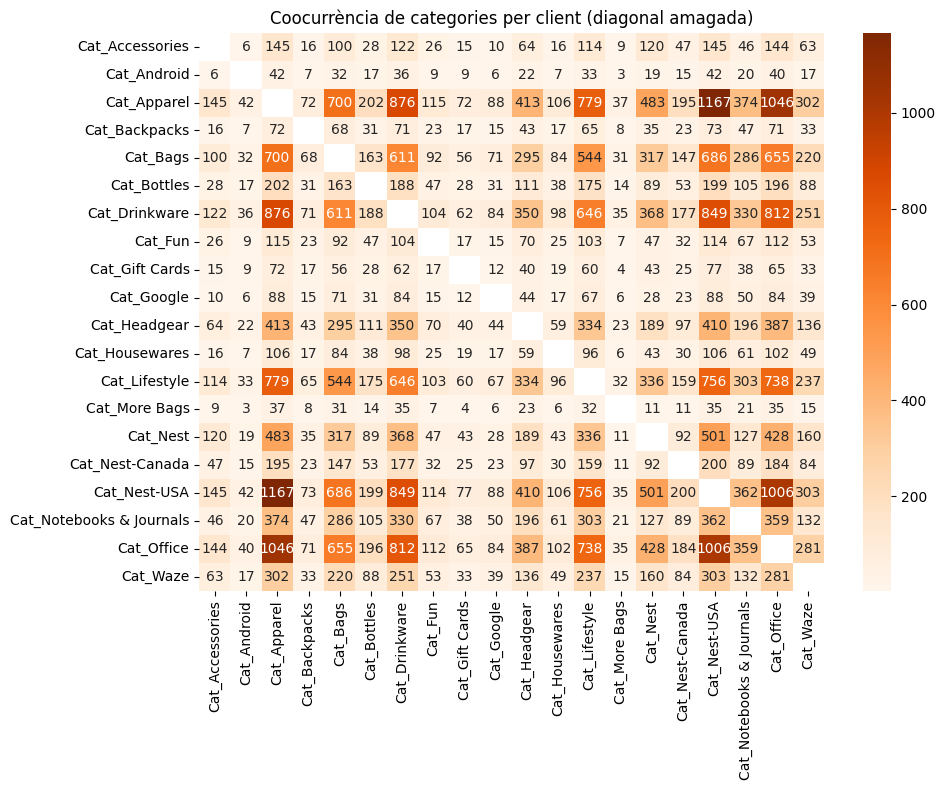

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionem categories
category_cols = [col for col in df.columns if col.startswith('Cat_')]

df_cat_cust = df[['CustomerID'] + category_cols]

# 2. Matriu binària per client i categoria
customer_cat = df_cat_cust.groupby('CustomerID')[category_cols].sum()
customer_cat = customer_cat.applymap(lambda x: 1 if x > 0 else 0)

# 3. Matriu de coocurrència
category_co_matrix_cust = customer_cat.T.dot(customer_cat)

# 4. Eliminem files/columnes buides si n'hi ha
category_co_matrix_cust = category_co_matrix_cust.loc[
    (category_co_matrix_cust.sum(axis=1) > 0),
    (category_co_matrix_cust.sum(axis=0) > 0)
]

# 5. Convertim NaNs a 0 per seguretat
category_co_matrix_cust = category_co_matrix_cust.fillna(0)

# 6. Eliminem visualment la diagonal
co_matrix_visual = category_co_matrix_cust.astype(float).copy()
np.fill_diagonal(co_matrix_visual.values, np.nan)

# 7. Visualització
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix_visual, annot=True, cmap="Oranges", fmt=".0f", cbar=True)
plt.title("Coocurrència de categories per client (diagonal amagada)")
plt.tight_layout()
plt.show()


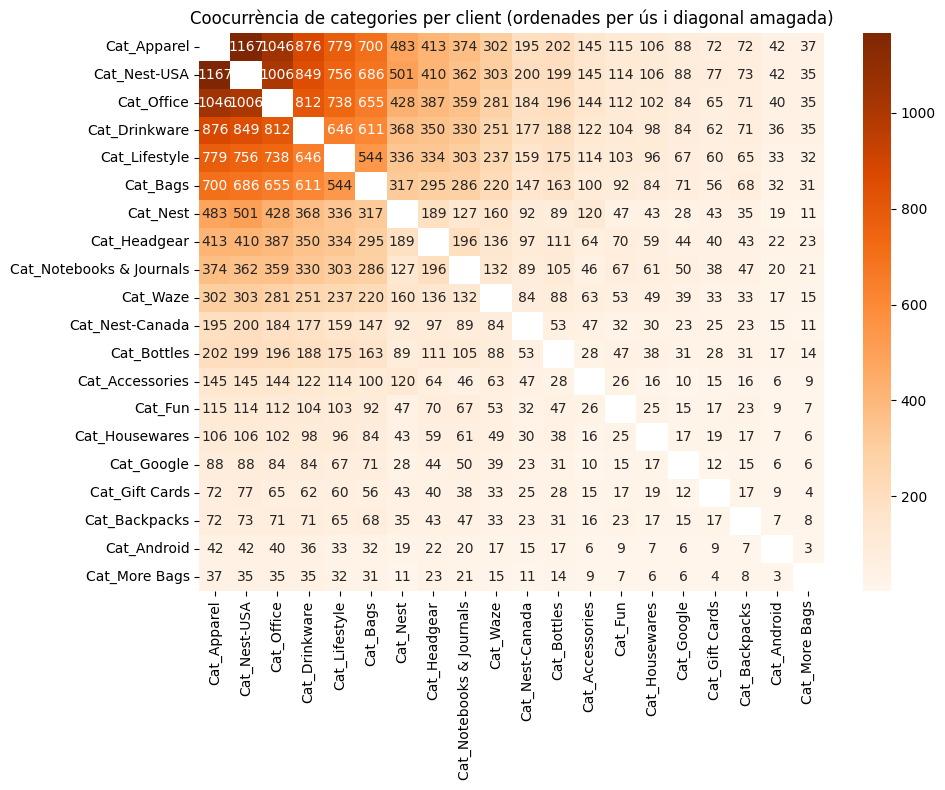

In [94]:
# 1. Ordenem les categories segons el total de compres per categoria
category_order = customer_cat.sum().sort_values(ascending=False).index.tolist()

# 2. Reordenem la matriu de coocurrència segons aquest ordre
co_matrix_visual = category_co_matrix_cust.loc[category_order, category_order].astype(float)

# 3. Amaguem la diagonal
np.fill_diagonal(co_matrix_visual.values, np.nan)

# 4. Visualització
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix_visual, annot=True, cmap="Oranges", fmt=".0f", cbar=True)
plt.title("Coocurrència de categories per client (ordenades per ús i diagonal amagada)")
plt.tight_layout()
plt.show()


In [95]:
# Comptem quants clients han comprat almenys una vegada cada categoria
clients_per_category = customer_cat.sum()

# Imprimim el resultat
print("Nombre de clients per categoria:")
print(clients_per_category)


Nombre de clients per categoria:
Cat_Accessories              150
Cat_Android                   42
Cat_Apparel                 1323
Cat_Backpacks                 75
Cat_Bags                     728
Cat_Bottles                  203
Cat_Drinkware                919
Cat_Fun                      118
Cat_Gift Cards                77
Cat_Google                    89
Cat_Headgear                 425
Cat_Housewares               107
Cat_Lifestyle                817
Cat_More Bags                 37
Cat_Nest                     516
Cat_Nest-Canada              205
Cat_Nest-USA                1260
Cat_Notebooks & Journals     383
Cat_Office                  1103
Cat_Waze                     309
dtype: int64


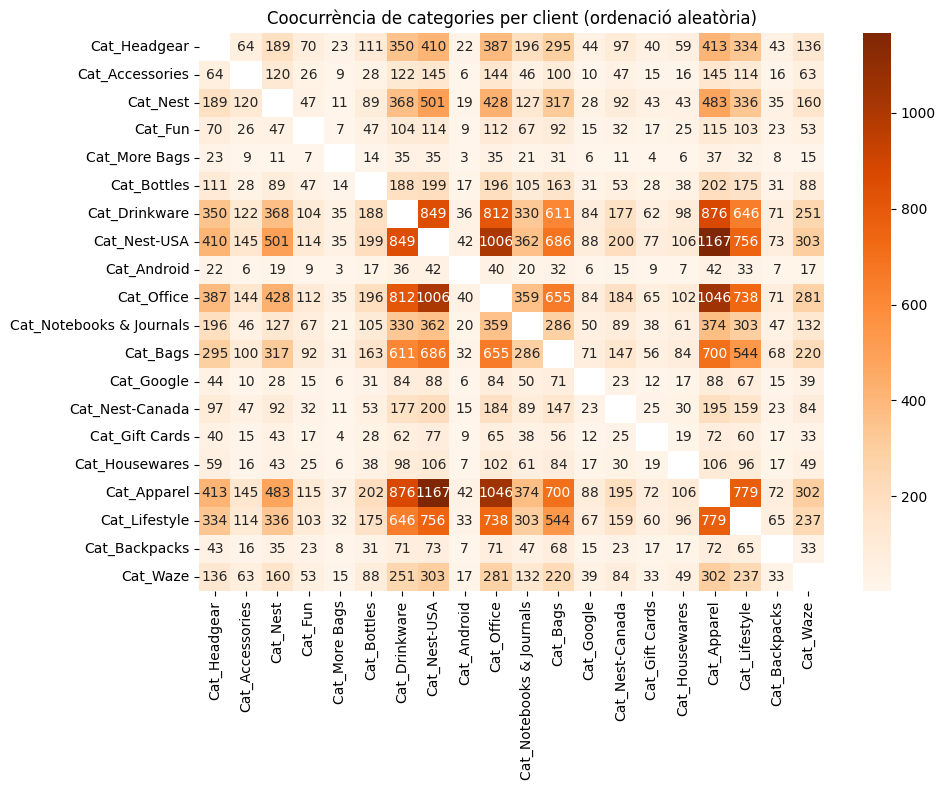

In [96]:
import random

# 1. Llista de categories aleatòriament ordenada
random_order = category_co_matrix_cust.columns.tolist()
random.shuffle(random_order)

# 2. Reordenem la matriu
co_matrix_random = category_co_matrix_cust.loc[random_order, random_order].astype(float)

# 3. Amaguem la diagonal
np.fill_diagonal(co_matrix_random.values, np.nan)

# 4. Visualització
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix_random, annot=True, cmap="Oranges", fmt=".0f", cbar=True)
plt.title("Coocurrència de categories per client (ordenació aleatòria)")
plt.tight_layout()
plt.show()


Normalitzem les coocurrències per no tenir un biaix cap a les dades que apareixen a la majoria de clients

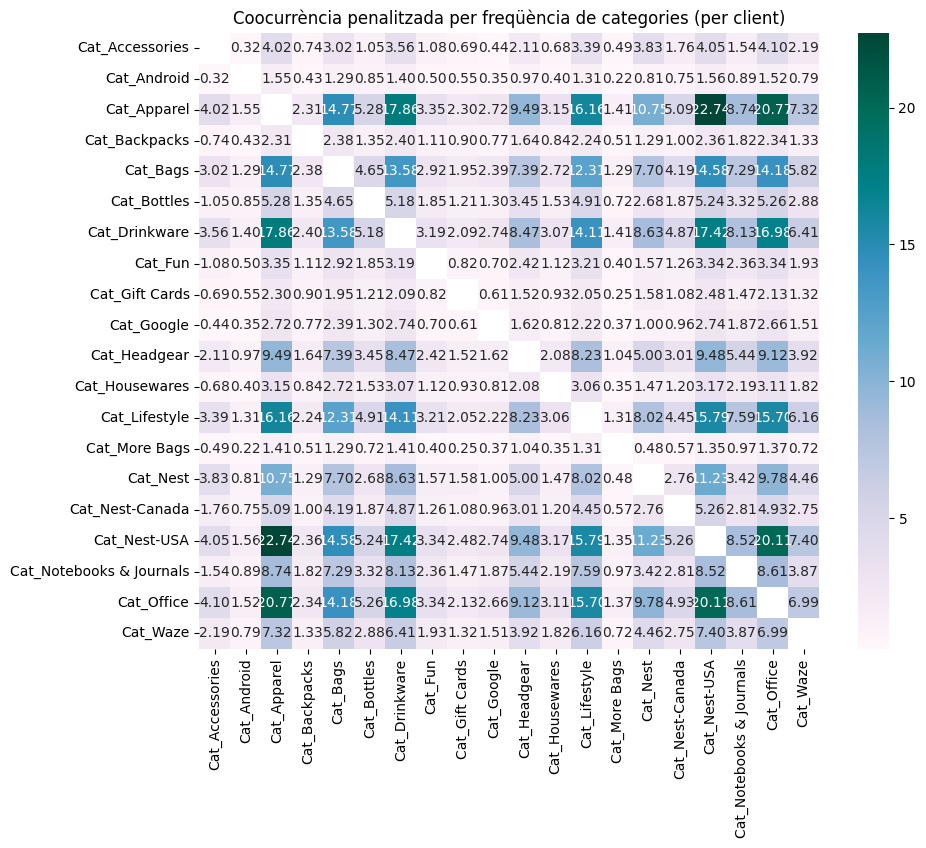

In [97]:
# A partir de `category_co_matrix_cust` i `customer_cat` ja creats abans

# Nombre total de clients que han comprat cada categoria
category_totals_cust = customer_cat.sum(axis=0)

# Penalització per freqüència
penalization = 1 / np.log1p(category_totals_cust)

# Coocurrència penalitzada
co_matrix_penalized = category_co_matrix_cust.astype(float).copy()

for cat1 in category_co_matrix_cust.columns:
    for cat2 in category_co_matrix_cust.columns:
        if cat1 != cat2:
            base = category_co_matrix_cust.loc[cat1, cat2]
            weight = penalization[cat1] * penalization[cat2]
            co_matrix_penalized.loc[cat1, cat2] = base * weight
        else:
            co_matrix_penalized.loc[cat1, cat2] = np.nan  # evitar diagonal

# Visualització
plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix_penalized, annot=True, cmap="PuBuGn", fmt=".2f", cbar=True)
plt.title("Coocurrència penalitzada per freqüència de categories (per client)")
plt.show()


Busquem ordenar les categories numèricament segons proximitat

In [98]:
from sklearn.manifold import MDS
import pandas as pd
import numpy as np

# Matriu de distància: invers de la coocurrència penalitzada
distance_matrix = 1 / co_matrix_penalized

# Tractament de NaNs i infinit: els convertim en una distància molt gran
distance_matrix = distance_matrix.replace([np.inf, -np.inf], np.nan)
distance_matrix = distance_matrix.fillna(distance_matrix.max().max() * 1.5)

# Asegurem la diagonal a 0 per compatibilitat amb MDS
np.fill_diagonal(distance_matrix.values, 0)

# MDS 1D
mds = MDS(n_components=1, dissimilarity='precomputed', random_state=42)
category_coords_1d = mds.fit_transform(distance_matrix)

# Ordre relacional com a valor ordinal
coords_series = pd.Series(category_coords_1d.flatten(), index=distance_matrix.index)
coords_ranked = coords_series.rank(method='dense').astype(int)

# Diccionari final
category_mds_order_map = coords_ranked.sort_values().to_dict()

print(category_mds_order_map)



{'Cat_Android': 1, 'Cat_Gift Cards': 2, 'Cat_Housewares': 3, 'Cat_Backpacks': 4, 'Cat_Nest': 5, 'Cat_Notebooks & Journals': 6, 'Cat_Waze': 7, 'Cat_Lifestyle': 8, 'Cat_Drinkware': 9, 'Cat_Bags': 10, 'Cat_Nest-USA': 11, 'Cat_Office': 12, 'Cat_Apparel': 13, 'Cat_Bottles': 14, 'Cat_Headgear': 15, 'Cat_Nest-Canada': 16, 'Cat_Fun': 17, 'Cat_Accessories': 18, 'Cat_Google': 19, 'Cat_More Bags': 20}


Busquem les temporalitats trimestrals de compra de cada categoria de productes i hi assignem un valor

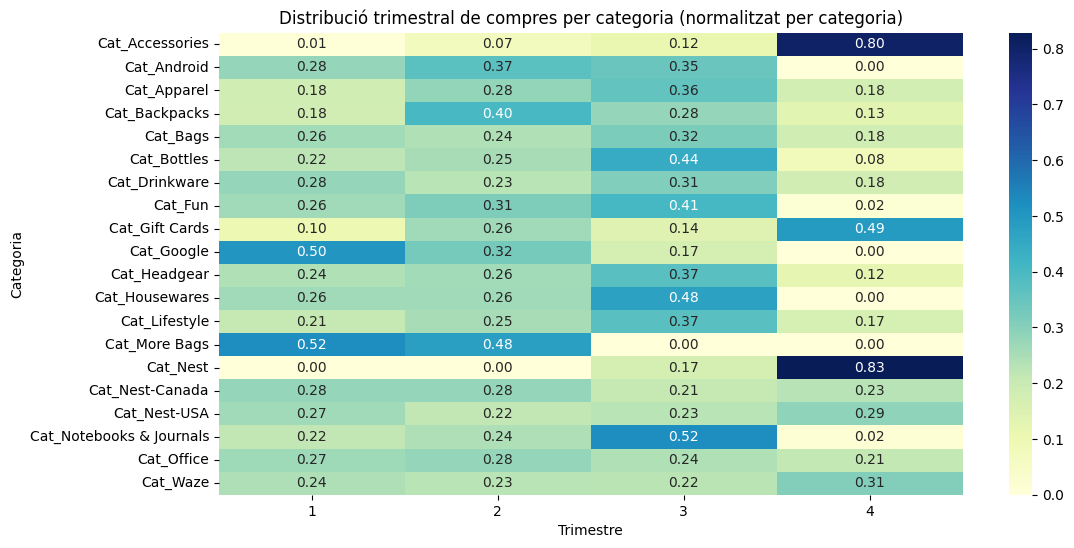

Cat_More Bags               1.478261
Cat_Google                  1.666667
Cat_Android                 2.069767
Cat_Fun                     2.181250
Cat_Housewares              2.213115
Cat_Notebooks & Journals    2.339119
Cat_Backpacks               2.370787
Cat_Headgear                2.380026
Cat_Nest-Canada             2.388013
Cat_Bottles                 2.388060
Cat_Drinkware               2.390181
Cat_Office                  2.399816
Cat_Bags                    2.419766
Cat_Lifestyle               2.495472
Cat_Apparel                 2.531888
Cat_Nest-USA                2.542924
Cat_Waze                    2.590253
Cat_Gift Cards              3.025157
Cat_Accessories             3.713675
Cat_Nest                    3.828480
Name: Seasonality_Index, dtype: float64

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assegurem-nos que 'Month' és numèrica
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Assignem trimestre
df['Quarter'] = df['Month'].apply(lambda x: (int(x)-1)//3 + 1 if pd.notnull(x) else None)

# Seleccionem les columnes de categoria i trimestre
category_cols = [col for col in df.columns if col.startswith('Cat_')]
df_cat_quarter = df[['Quarter'] + category_cols].copy().dropna()

# Agrupem per trimestre i sumem les compres per categoria
category_quarter_matrix = df_cat_quarter.groupby('Quarter')[category_cols].sum().T

# Normalització per files (per categoria)
category_quarter_norm = category_quarter_matrix.div(category_quarter_matrix.sum(axis=1), axis=0)

# Visualització amb escala de proporció
plt.figure(figsize=(12, 6))
sns.heatmap(category_quarter_norm, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Distribució trimestral de compres per categoria (normalitzat per categoria)")
plt.xlabel("Trimestre")
plt.ylabel("Categoria")
plt.show()


# Índex temporal per trimestre
quarter_weights = pd.Series({1: 1, 2: 2, 3: 3, 4: 4})

# Calculem la mitjana ponderada per cada categoria
seasonality_index = category_quarter_norm.dot(quarter_weights)

# Afegim-ho com a nova feature
seasonality_index.name = 'Seasonality_Index'

# Mostrem resultats ordenats
seasonality_index = seasonality_index.sort_values()
seasonality_index


Creem un dataframe on ajuntem les dades de les categories que hem obtingut

In [100]:
# 1. Identifiquem la categoria principal per cada fila
category_cols = [col for col in df.columns if col.startswith('Cat_')]

def get_category(row):
    for col in category_cols:
        if row[col] == 1:
            return col
    return None

# 2. Creem una còpia del dataframe i afegim la categoria principal
df_with_categories = df.copy()
df_with_categories['Product_Category'] = df_with_categories.apply(get_category, axis=1)

# 3. Apliquem el mapatge de valors ordinals obtingut via MDS
df_with_categories['Category_Ordinal_MDS'] = df_with_categories['Product_Category'].map(category_mds_order_map)


Preparem el clustering de categories

In [101]:
# 1. MDS 1D des de la matriu de coocurrència penalitzada
mds_series = pd.Series(category_coords_1d.flatten(), index=distance_matrix.index, name='MDS_1D')

# 2. Índex d'estacionalitat calculat abans
seasonality_index.name = 'Seasonality_Index'

# 3. Unificació de les dues fonts en un sol DataFrame
df_cat_features = pd.concat([mds_series, seasonality_index], axis=1).dropna()


Apliquem K-means a les categories de productes

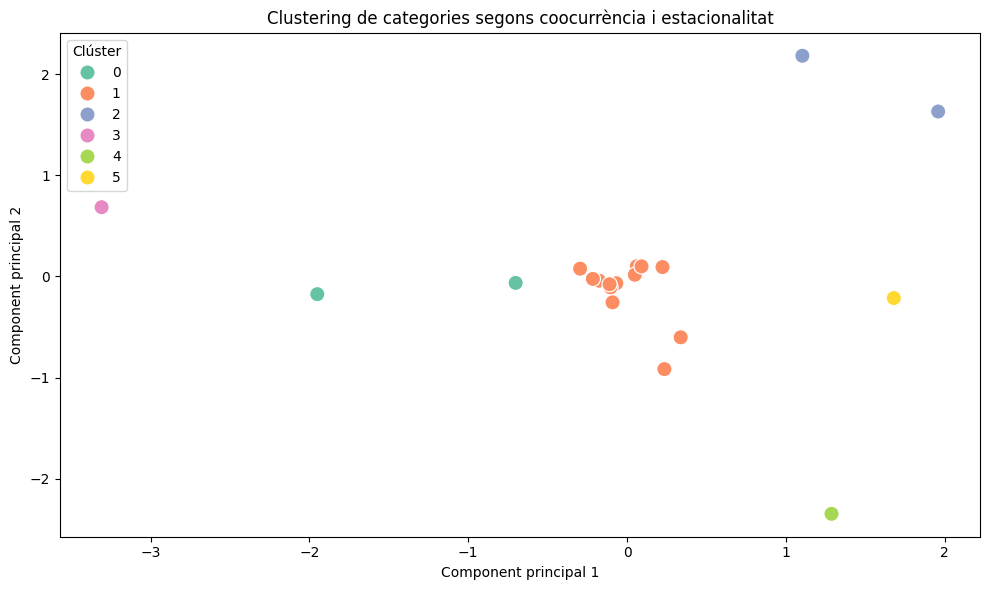

Silhouette Score (K-Means): 0.493
Davies Bouldin Score (K-Means): 0.402


In [102]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df_cat_features.columns = df_cat_features.columns.astype(str)


# Escalem les dades
X = StandardScaler().fit_transform(df_cat_features)

# Reducció de dimensionalitat per visualització
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

# Clustering amb K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

# Construïm el DataFrame per visualitzar
df_plot = pd.DataFrame(coords, columns=['PC1', 'PC2'], index=df_cat_features.index)
df_plot['Cluster'] = labels

# Visualització
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', s=120, palette="Set2")
plt.title("Clustering de categories segons coocurrència i estacionalitat")
plt.xlabel("Component principal 1")
plt.ylabel("Component principal 2")
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

# Resultats agrupats
df_plot.sort_values(by='Cluster')

sil_score = silhouette_score(X, labels)  # Per K-Means
print(f"Silhouette Score (K-Means): {round(sil_score, 3)}")
db_score = davies_bouldin_score(X, labels)
print(f"Davies Bouldin Score (K-Means): {round(db_score, 3)}")


Spectral Clustering a les categories de productes

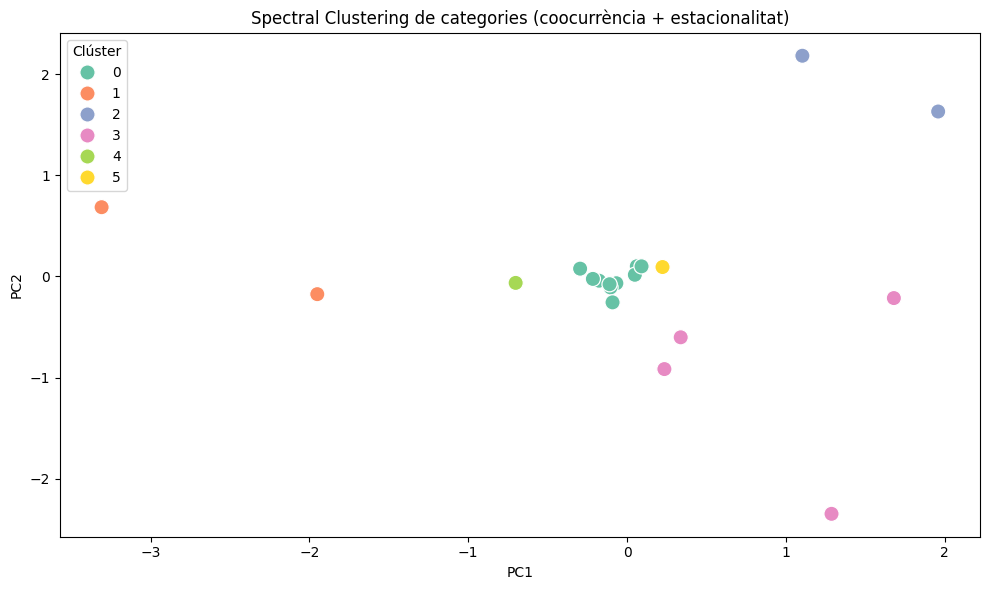

Silhouette Score (Spectral): 0.173
Davies Bouldin Score (Spectral): 0.402


In [103]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Escalem les dades
X = StandardScaler().fit_transform(df_cat_features.drop(columns=['Cluster'], errors='ignore'))

# Spectral Clustering (pots ajustar n_clusters)
spectral = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
spectral_labels = spectral.fit_predict(X)

# Visualització amb PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

df_plot_spectral = pd.DataFrame(coords, columns=['PC1', 'PC2'], index=df_cat_features.index)
df_plot_spectral['Cluster'] = spectral_labels

# Gràfic
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_spectral, x='PC1', y='PC2', hue='Cluster', s=120, palette="Set2")
plt.title("Spectral Clustering de categories (coocurrència + estacionalitat)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

# Llistat de categories agrupades
df_plot_spectral.sort_values(by='Cluster')

sil_score_spectral = silhouette_score(X, spectral_labels)  # Per Spectral Clustering
print(f"Silhouette Score (Spectral): {round(sil_score_spectral, 3)}")
db_score = davies_bouldin_score(X, labels)
print(f"Davies Bouldin Score (Spectral): {round(db_score, 3)}")


Ara afegim els valors dels diferents clusters a les dades per tal de tenir-los guardats

In [104]:
# Guardem els clústers com a diccionari: categoria → clúster
category_cluster_map_kmeans = df_plot['Cluster'].to_dict()
category_cluster_map_spectral = df_plot_spectral['Cluster'].to_dict()

df_with_categories['Category_Cluster_KMeans'] = df_with_categories['Product_Category'].map(category_cluster_map_kmeans)
df_with_categories['Category_Cluster_Spectral'] = df_with_categories['Product_Category'].map(category_cluster_map_spectral)


Productes agrupats segons clusters


In [105]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')  # Ens assegurem que és numèrica

df['Quarter'] = df['Month'].apply(lambda x: (int(x) - 1) // 3 + 1 if pd.notnull(x) else None)


In [106]:
# Recalculem les noves variables
num_clients = df.groupby('Product_Description')['CustomerID'].nunique().rename('Num_Clients')
avg_quarter = df.groupby('Product_Description')['Quarter'].mean().rename('Avg_Quarter')

df_products = df_with_categories.groupby('Product_Description').agg({
    'Quantity': 'sum',
    'Avg_Price': 'mean',
    'Category_Ordinal_MDS': 'first',
    'Category_Cluster_KMeans': 'first',
    'Category_Cluster_Spectral': 'first',
    'Product_Category': 'first'
}).join([num_clients, avg_quarter]).dropna()



In [107]:
df_products.head()

,Quantity,Avg_Price,Category_Ordinal_MDS,Category_Cluster_KMeans,Category_Cluster_Spectral,Product_Category,Num_Clients,Avg_Quarter
Product_Description,,,,,,,,
Dog Frisbee,767.0,1.372708,8,1,0,Cat_Lifestyle,100,2.423611
1 oz Hand Sanitizer,2434.0,1.873566,8,1,0,Cat_Lifestyle,112,2.217054
20 oz Stainless Steel Insulated Tumbler,392.0,22.348053,9,1,0,Cat_Drinkware,97,1.628319
22 oz Android Bottle,1010.0,2.787122,14,1,0,Cat_Bottles,121,2.179856
22 oz YouTube Bottle Infuser,1080.0,4.137674,14,1,0,Cat_Bottles,113,2.612403


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from itertools import combinations
import warnings

warnings.filterwarnings("ignore")  # Per evitar spam de warnings en execucions llargues

def aplicar_clustering(X, method='kmeans', k=3):
    if method == 'kmeans':
        model = KMeans(n_clusters=k, random_state=42)
    elif method == 'agglomerative':
        model = AgglomerativeClustering(n_clusters=k)
    elif method == 'dbscan':
        model = DBSCAN(eps=0.5, min_samples=5)
    else:
        raise ValueError("Mètode no suportat")

    labels = model.fit_predict(X)

    # Silhouette Score només si hi ha més d’un clúster
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1  # Score no vàlid si només hi ha un clúster

    return score, labels


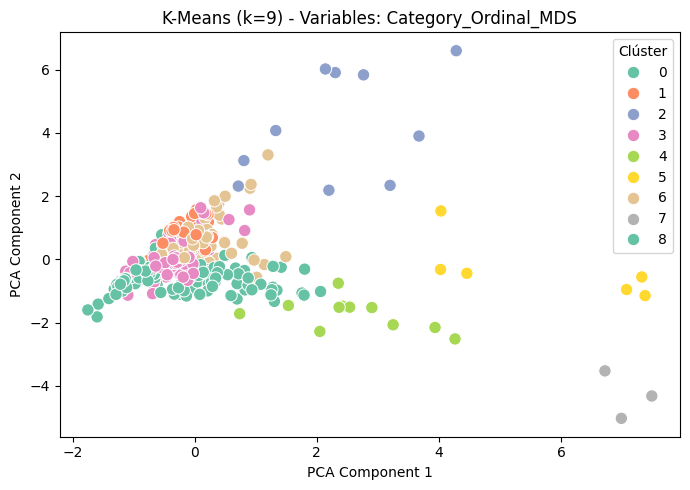

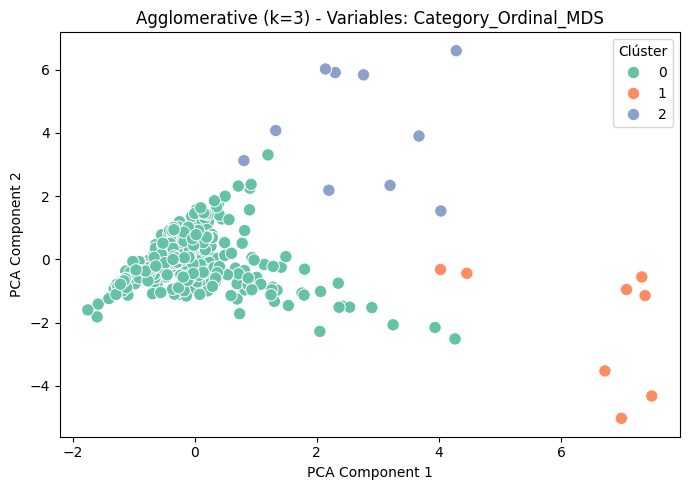

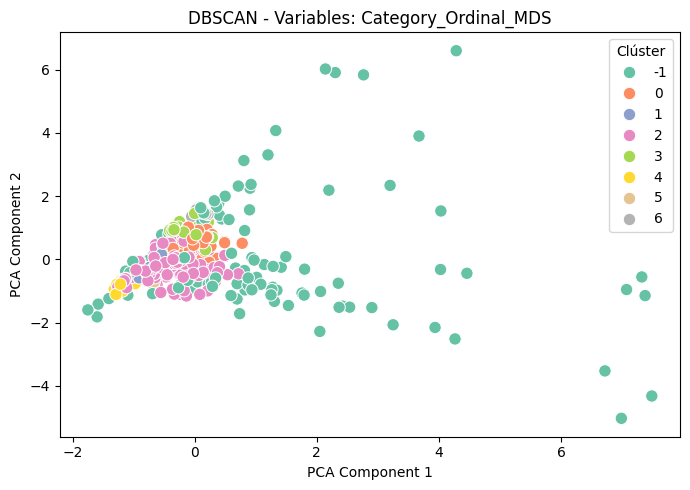

['Avg_Price', 'Quantity', 'Num_Clients', 'Avg_Quarter', 'Category_Ordinal_MDS'] | KMeans: 0.3171 | Agglomerative: 0.616 | DBSCAN: -0.0321


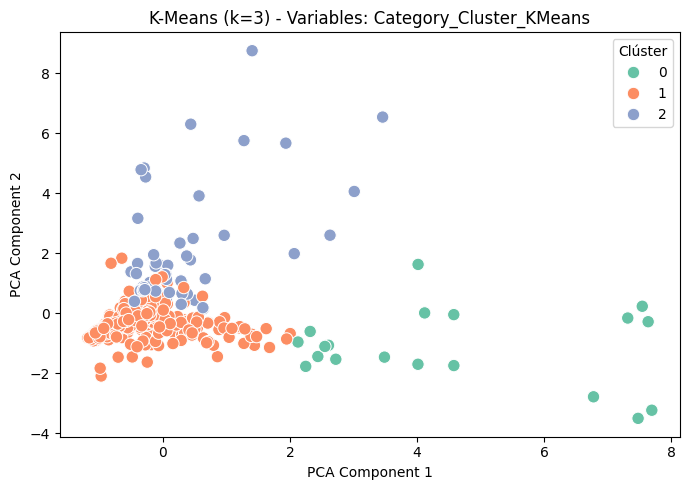

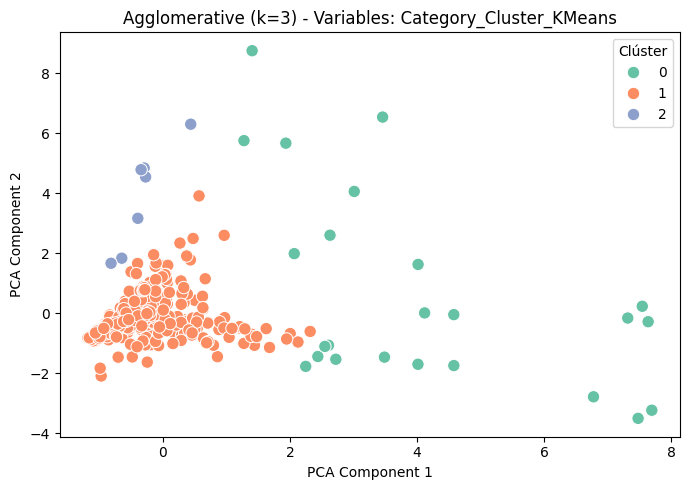

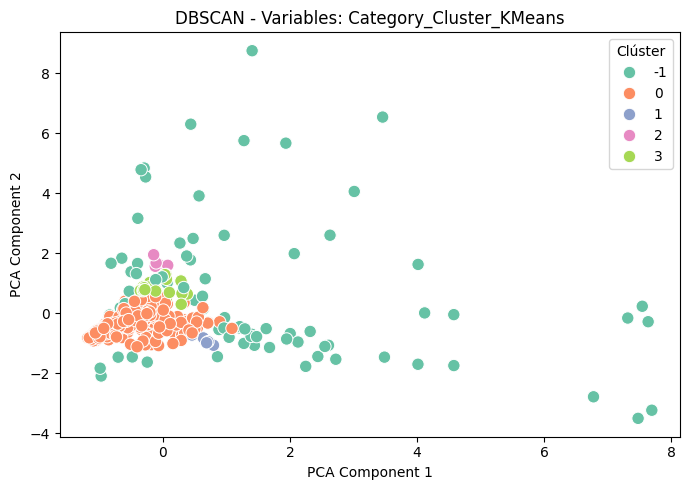

['Avg_Price', 'Quantity', 'Num_Clients', 'Avg_Quarter', 'Category_Cluster_KMeans'] | KMeans: 0.4742 | Agglomerative: 0.6666 | DBSCAN: 0.216


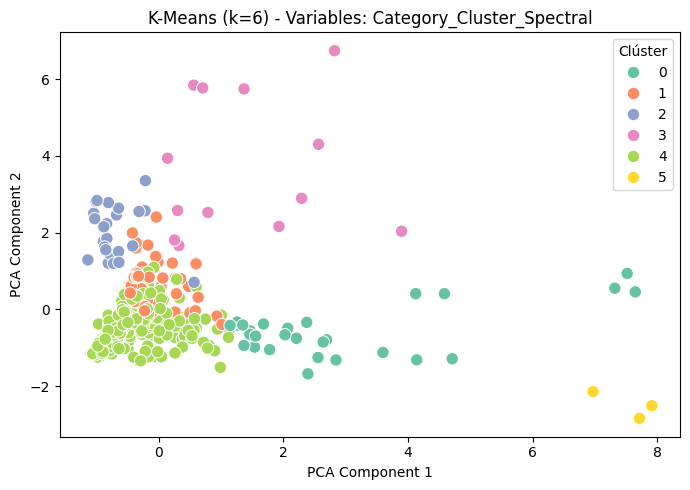

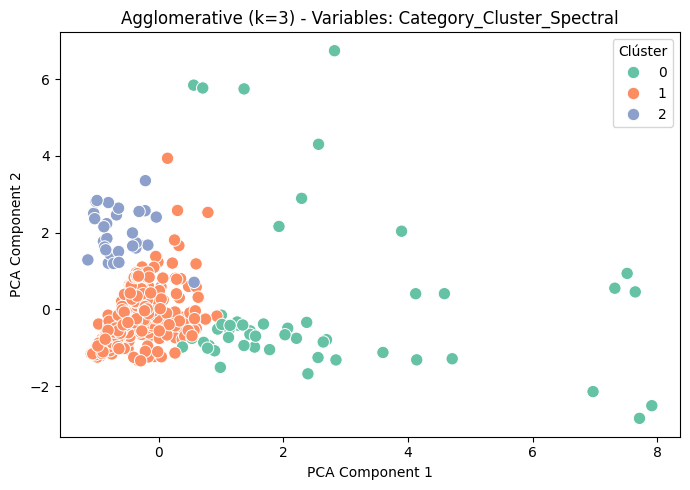

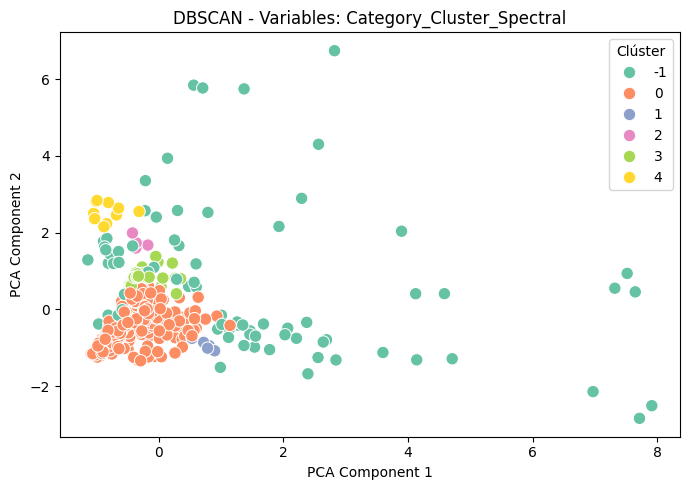

['Avg_Price', 'Quantity', 'Num_Clients', 'Avg_Quarter', 'Category_Cluster_Spectral'] | KMeans: 0.4221 | Agglomerative: 0.4928 | DBSCAN: 0.2202


,Variables,Method,Best_k,Silhouette_Score
4,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",Agglomerative,3,0.666620
1,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",Agglomerative,3,0.615969
7,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",Agglomerative,3,0.492751
3,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",KMeans,3,0.474210
6,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",KMeans,6,0.422083
0,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",KMeans,9,0.317077
8,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",DBSCAN,N/A,0.220248
5,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",DBSCAN,N/A,0.215989
2,"[Avg_Price, Quantity, Num_Clients, Avg_Quarter...",DBSCAN,N/A,-0.032128


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Variables disponibles
variables_num = [
    'Avg_Price', 'Quantity', 'Num_Clients', 'Avg_Quarter'
]

variables_categoricals = [
    'Category_Ordinal_MDS',
    'Category_Cluster_KMeans',
    'Category_Cluster_Spectral'
]

K_range = [3, 6, 9]
resultats = []

for cat_var in variables_categoricals:
    vars_actuals = variables_num + [cat_var]
    try:
        X = df_products[vars_actuals].dropna()
        if X.shape[0] < max(K_range):
            continue

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Reducció dimensional per visualitzar
        pca = PCA(n_components=2)
        coords = pca.fit_transform(X_scaled)

        ## 1. K-Means
        best_k_score = -1
        best_k = None
        best_k_labels = None
        for k in K_range:
            model = KMeans(n_clusters=k, random_state=42)
            labels = model.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
            if score > best_k_score:
                best_k_score = score
                best_k = k
                best_k_labels = labels

        resultats.append({
            'Variables': vars_actuals,
            'Method': 'KMeans',
            'Best_k': best_k,
            'Silhouette_Score': best_k_score
        })

        # Plot
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=best_k_labels, palette='Set2', s=80)
        plt.title(f"K-Means (k={best_k}) - Variables: {cat_var}")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Clúster")
        plt.tight_layout()
        plt.show()

        ## 2. Agglomerative
        best_aggl_score = -1
        best_k = None
        best_aggl_labels = None
        for k in K_range:
            model = AgglomerativeClustering(n_clusters=k)
            labels = model.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
            if score > best_aggl_score:
                best_aggl_score = score
                best_k = k
                best_aggl_labels = labels

        resultats.append({
            'Variables': vars_actuals,
            'Method': 'Agglomerative',
            'Best_k': best_k,
            'Silhouette_Score': best_aggl_score
        })

        # Plot
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=best_aggl_labels, palette='Set2', s=80)
        plt.title(f"Agglomerative (k={best_k}) - Variables: {cat_var}")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Clúster")
        plt.tight_layout()
        plt.show()

        ## 3. DBSCAN
        model = DBSCAN(eps=0.5, min_samples=5)
        labels = model.fit_predict(X_scaled)
        dbscan_score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1
        resultats.append({
            'Variables': vars_actuals,
            'Method': 'DBSCAN',
            'Best_k': 'N/A',
            'Silhouette_Score': dbscan_score
        })

        # Plot
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=labels, palette='Set2', s=80)
        plt.title(f"DBSCAN - Variables: {cat_var}")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Clúster")
        plt.tight_layout()
        plt.show()

        print(f"{vars_actuals} | KMeans: {round(best_k_score, 4)} | Agglomerative: {round(best_aggl_score, 4)} | DBSCAN: {round(dbscan_score, 4)}")

    except Exception as e:
        print(f" Error amb {vars_actuals}: {e}")
        continue

# Resultats finals
df_resultats = pd.DataFrame(resultats).sort_values(by='Silhouette_Score', ascending=False)
df_resultats.to_csv("comparativa_clustering_productes_k369_grafics.csv", index=False)
df_resultats.head(10)
